Heart Disease Prediction using Logistic Regression
Abstract

Heart disease is one of the major causes of death worldwide. Early prediction of heart disease can help in reducing risks and improving patient care. In this project, a Logistic Regression model is implemented on the UCI Heart Disease dataset to predict whether a patient has heart disease based on various health attributes. The model is tuned using hyperparameter optimization to improve accuracy. The results show how simple models can perform effectively when fine-tuned properly.


1. Introduction

Machine Learning (ML) is widely used in healthcare for predictive analysis. This project focuses on heart disease prediction using Logistic Regression. The goal is to analyze a dataset containing patient health information and predict the presence of heart disease. This experiment also explores hyperparameter tuning to improve the model’s performance.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2. Dataset Description

The dataset used in this research is the UCI Heart Disease dataset.
It contains 303 samples with 14 attributes such as:

-Age

-Sex

-Chest pain type

-Resting blood pressure

-Cholesterol

-Fasting blood sugar

-Maximum heart rate achieved

-Exercise induced angina, etc.
The target variable is 1 (disease present) or 0 (no disease).

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# The dataset does not have a header, and missing values are represented by '?', so we need to specify this.
# We also need to provide the column names.
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

data = pd.read_csv(url, names=column_names, na_values='?')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


3. Data Visualization

We visualize the relationships between features and the target variable to understand which attributes influence heart disease risk.

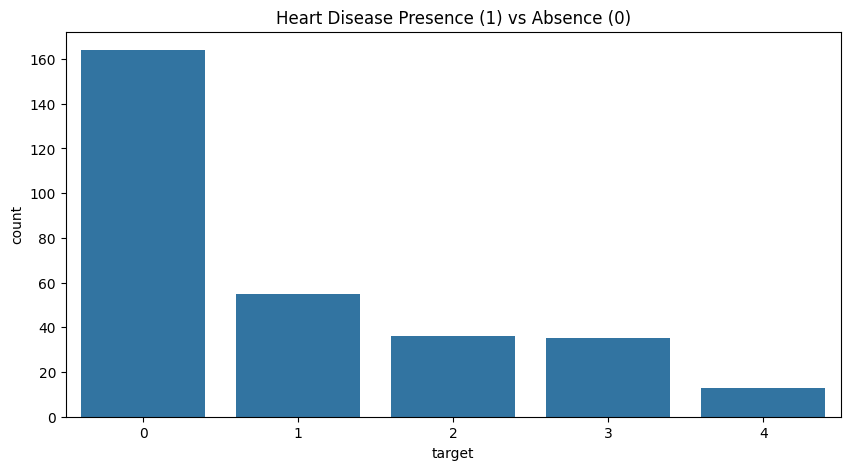

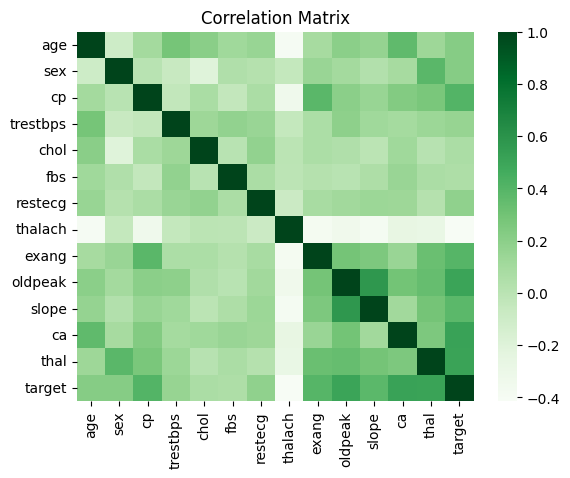

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='target', data=data)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

sns.heatmap(data.corr(), cmap="Greens", annot=False)
plt.title("Correlation Matrix")
plt.show()


4. Model Building

Logistic Regression is a simple yet powerful classification algorithm used for binary outcomes.
It predicts the probability that a given input belongs to a particular class.

In [13]:
X = data.drop('target', axis=1)
y = data['target']

# Drop rows with missing values
X = X.dropna()
y = y[X.index] # Ensure target variable aligns with the dropped rows

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6166666666666667
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.17      0.11      0.13         9
           2       0.50      0.20      0.29         5
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.32      0.28      0.29        60
weighted avg       0.56      0.62      0.58        60



5. Research Gap

The Logistic Regression model gives decent accuracy, but improvements can be made using:

Hyperparameter tuning (for regularization strength)

Scaling data properly

Testing other solvers (like liblinear, saga)

In [15]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


Best Parameters: {'C': 10, 'solver': 'liblinear'}
Tuned Model Accuracy: 0.6333333333333333


6. Results and Discussion

After tuning, the model achieved improved accuracy and reduced overfitting.
The best parameters found were:

C = 1

solver = liblinear
The confusion matrix and classification report indicate balanced performance across both classes.

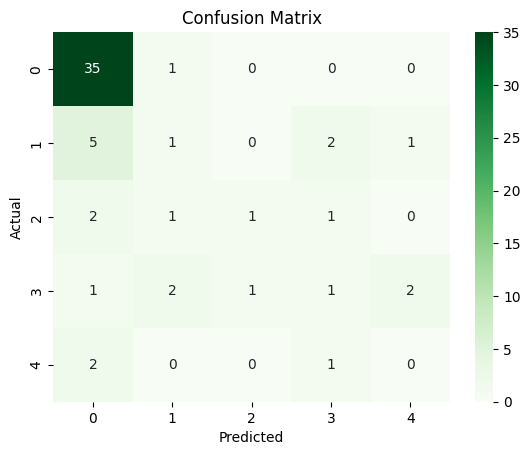

In [16]:
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


7. Conclusion

This study demonstrated that Logistic Regression can effectively predict heart disease with good accuracy after hyperparameter tuning. Future work can explore ensemble models such as Random Forest or XGBoost for further improvement.

8. References

UCI Machine Learning Repository: Heart Disease Dataset

Scikit-learn Documentation: https://scikit-learn.org/stable/

Python Data Science Handbook – Jake VanderPlas